<a href="https://colab.research.google.com/github/ORUNSOLU/Practice/blob/main/Animal_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer learning would be used for this task. The best score I got training from scratch was a little above 80% which is poor

I would be using a pre-trained model (Densenet) to classify images into MUCCA & PECORA. 

**Mount Google drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Load Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras

import pandas as pd                                     
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.image as mpimg
import warnings

warnings.filterwarnings('ignore')

Load the data

In [ ]:
train_labels = pd.read_csv('/content/drive/My Drive/animal_data/Training_set_animals.csv')
test_labels = pd.read_csv('/content/drive/My Drive/animal_data/Testing_set_animals.csv', header=None)

train_dir = '/content/drive/My Drive/animal_data/train_beg/'
test_dir = '/content/drive/My Drive/animal_data/test_beg/'

train_labels.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


Preprocess and Split the Data

In [ ]:
train_ds = image_dataset_from_directory(train_dir, labels= 'inferred', validation_split=0.2, subset='training', shuffle=True, image_size=(224, 224), batch_size=32, seed=123, color_mode='rgb', smart_resize=True)
val_ds = image_dataset_from_directory(train_dir, labels= 'inferred', validation_split=0.2, subset='validation', shuffle=True, image_size=(224, 224), batch_size=32, seed=123, color_mode='rgb', smart_resize=True)

Found 1200 files belonging to 2 classes.
Using 960 files for training.
Found 1200 files belonging to 2 classes.
Using 240 files for validation.


Display some images

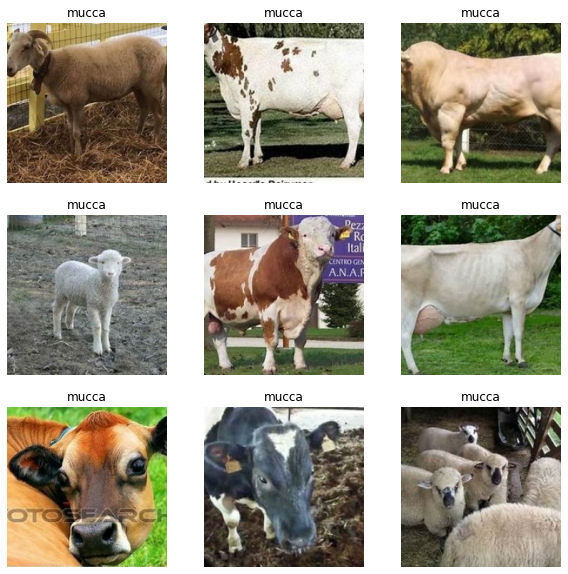

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_labels['animal_type'][i])
    plt.axis("off")



Build the Model

In [ ]:
base_model = keras.applications.densenet.DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.summary()

51879936/51877672 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
flatten (Flatten)            (None, 81536)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              83493888  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________

Add CallBack

In [ ]:
path = "/content/drive/My Drive/animal_data/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)

Compile the Model

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate = 2e-5)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[tensorboard_callback, checkpoint_cb])

Epoch 1/10
30/30 [==============================] - 193s 5s/step - loss: 0.4929 - accuracy: 0.8396 - val_loss: 0.1737 - val_accuracy: 0.9333
Epoch 2/10
30/30 [==============================] - 18s 568ms/step - loss: 0.0869 - accuracy: 0.9688 - val_loss: 0.2472 - val_accuracy: 0.9458
Epoch 3/10
30/30 [==============================] - 17s 566ms/step - loss: 0.0120 - accuracy: 0.9990 - val_loss: 0.1701 - val_accuracy: 0.9417
Epoch 4/10
30/30 [==============================] - 17s 558ms/step - loss: 0.0333 - accuracy: 0.9875 - val_loss: 0.2462 - val_accuracy: 0.9542
Epoch 5/10
30/30 [==============================] - 17s 564ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.9583
Epoch 6/10
30/30 [==============================] - 17s 563ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2844 - val_accuracy: 0.9583
Epoch 7/10
30/30 [==============================] - 17s 563ms/step - loss: 0.0718 - accuracy: 0.9802 - val_loss: 0.2652 - val_accuracy: 0.9583
E

View the Training and Validation loss & accuracy

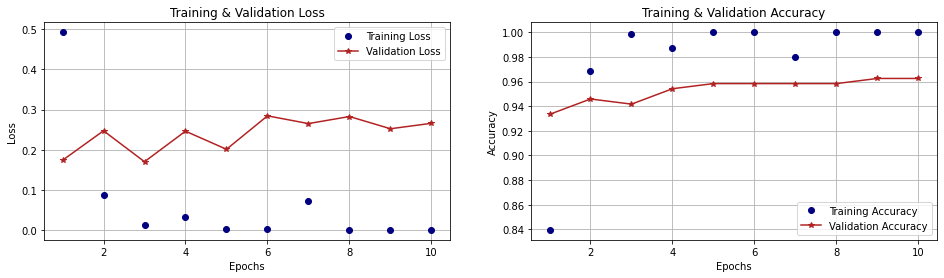

In [ ]:
def show_plots(history):
  """ Useful function to view plot of loss values & accuracies across the various epochs """
  loss_vals = history['loss']
  val_loss_vals = history['val_loss']
  epochs = range(1, len(history['accuracy'])+1)
    
  f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
  # plot losses on ax[0]
  ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
  ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
  ax[0].set_title('Training & Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend(loc='best')
  ax[0].grid(True)
    
  # plot accuracies
  acc_vals = history['accuracy']
  val_acc_vals = history['val_accuracy']

  ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
  ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
  ax[1].set_title('Training & Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend(loc='best')
  ax[1].grid(True)
    
  plt.show()
  plt.close()

show_plots(history.history)

Validate the Model

In [ ]:
val_loss, val_acc = model.evaluate(val_ds)
print('val loss: {}, val acc: {}'.format(val_loss, val_acc))

8/8 [==============================] - 1s 112ms/step - loss: 0.3449 - accuracy: 0.9583
val loss: 0.34489884972572327, val acc: 0.9583333134651184


Make some predictions

In [ ]:
test_ds = image_dataset_from_directory(test_dir, shuffle=False, image_size=(224, 224), batch_size=1, color_mode='rgb', smart_resize=True)

Found 400 files belonging to 1 classes.


In [ ]:
predicted = model.predict_classes(test_ds)
predicted[:10]

'mucca' (i.e. 0) or 'pecora' (i.e. 1)

In [ ]:
#function to convert back to class_names, for submission
def modify(x):
  return 'mucca' if x==1 else 'pecora'

pred = []
pred = map(modify, predicted)

pred = list(pred)
pred[:10]

Save the predictions locally, so that the answers can be uploaded

In [ ]:
from google.colab import files

test_labels['prediction'] = pred
test_labels.to_csv('predictions.csv')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>